In [1]:
import ast
import bs4
import time
import json
import requests
import pandas as pd
import scipy as scipy
import numpy as np
from bs4 import BeautifulSoup
from datetime import datetime
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('clean_df.csv')

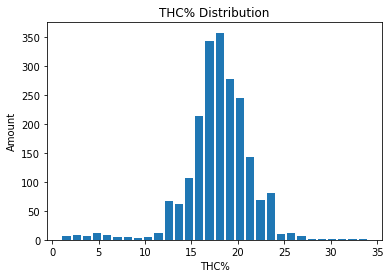

In [3]:
## THC % Distribution ##

df['THC'].hist(bins=30,rwidth=0.8,grid=False)
plt.xlabel('THC%')
plt.ylabel('Amount')
plt.title('THC% Distribution')

plt.show()

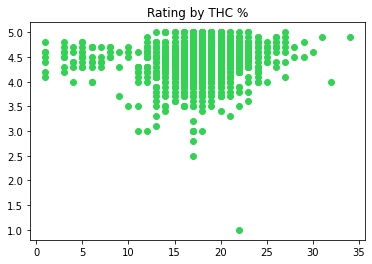

In [4]:
## Strain rating by THC % ##

fig = plt.figure()
ax =plt.axes()

ax.scatter(df.THC,df.Rating,color='#32D352')
plt.title("Rating by THC %")

plt.show()

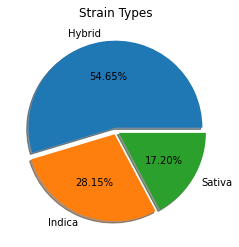

In [5]:
## Strain types in our data ##

most_freq1 = df['Type'].value_counts()
explode = (0.04, 0.04, 0.04)
most_freq1.plot(kind='pie',autopct='%1.2f%%',shadow=True,explode=explode,ylabel='')
plt.title('Strain Types')

plt.show()


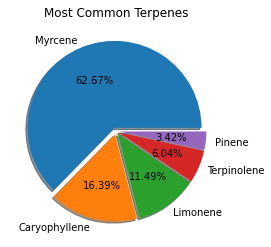

In [9]:
## Most common terpenes ##

most_freq1 = df['Top Terpene'].value_counts().head(5)
explode = (0.04, 0.04, 0.04, 0.04, 0.04)

most_freq1.plot(kind='pie',autopct='%1.2f%%',shadow=True,explode=explode,ylabel='')
plt.title('Most Common Terpenes')

plt.show()


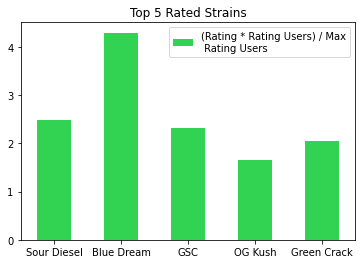

In [12]:
## Top 5 rated strains ##

top_rated_strains = df.copy()
max_rating_users = top_rated_strains['Rating Users'].max()

top_rated_strains['Overall Rating'] = (top_rated_strains['Rating'] * top_rated_strains['Rating Users']) / max_rating_users ## Normalize rating

top_rating = top_rated_strains['Overall Rating'].nlargest()
values = top_rating.values.tolist()
top_rated = top_rated_strains[(top_rated_strains['Overall Rating'] == values[0]) | (top_rated_strains['Overall Rating'] == values[1]) | (top_rated_strains['Overall Rating'] == values[2]) | (top_rated_strains['Overall Rating'] == values[3]) | (top_rated_strains['Overall Rating'] == values[4])]


top_rated = top_rated[['Strain Name','Overall Rating']].set_index('Strain Name',drop=True)

ax =plt.axes()
top_rated.plot(kind='bar',xlabel='',color='#32D352',ax=ax,rot=0)
plt.legend(['(Rating * Rating Users) / Max\n Rating Users'])
plt.title('Top 5 Rated Strains')

plt.show()
